#ref https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

In [9]:
from pandas import read_csv

df = read_csv('../data/features-2013-1.csv')
df.head()

,day,address,income,expenditure,neighbors,lengths,counts,loops,label
0,1,1dice6YgEVBf88erBFra9BHf6ZMoyvG88,1000000,1000000,1,0,1,0,0
1,1,133f33VEDKrVTwtQYgh5z4rLLhP9ibm6tk,3036250,3036250,1,1,1,0,0
2,1,1DvMt7dGAZeKqzJF4nDx74qK37ziftRjTf,4086250,4086250,1,0,1,0,0
3,1,14YxH6t4BL5nKuWD9fSHdzz4Xuk512R7Cs,2000000,2000000,1,0,1,0,0
4,1,1dice7fUkz5h4z2wPc1wLMPWgB5mDwKDx,2000000,2000000,1,0,1,0,0


In [10]:
df.label.value_counts()

0    6180
1     161
Name: label, dtype: int64

In [11]:
df.shape

(6341, 9)

In [12]:
#remove address columns
df = df.drop(columns=['address'])

In [13]:
X = df.values
X

array([[         1,    1000000,    1000000, ...,          1,          0,
                 0],
       [         1,    3036250,    3036250, ...,          1,          0,
                 0],
       [         1,    4086250,    4086250, ...,          1,          0,
                 0],
       ...,
       [        31,  123699090,  123699090, ...,          1,          0,
                 0],
       [        31,   40000000,   40000000, ...,          1,          0,
                 0],
       [        31, 2050678873, 2050678873, ...,          1,          0,
                 0]])

In [14]:
#Using multiple train-test splits will result in more models being trained,
#and in turn, a more accurate estimate of the performance of the models on unseen data.

In [15]:
df = df.set_index('day')
df.head()

,income,expenditure,neighbors,lengths,counts,loops,label
day,,,,,,,
1,1000000,1000000,1,0,1,0,0
1,3036250,3036250,1,1,1,0,0
1,4086250,4086250,1,0,1,0,0
1,2000000,2000000,1,0,1,0,0
1,2000000,2000000,1,0,1,0,0


In [16]:
from sklearn.ensemble import RandomForestClassifier
def train_model(history, one_step_test):
    
    #extract features and labels
    X_train = history.drop(columns=['label']).values
    y_train = history[['label']].values
    X_test = one_step_test.drop(columns=['label']).values
    y_test = one_step_test[['label']].values
    
    # fit model
    model = RandomForestClassifier(n_estimators=1000)
    model.fit(X_train, y_train.ravel())
    
    # make a one-step prediction
    y_pred = model.predict(X_test)
    return y_pred

In [17]:
predictions = []
actual = []

for t in range(1, len(set(df.index))):
    
    #creating temporal windows for training and testing
    history = df.loc[0:t]
    one_step_test = df.loc[t+1]
    
    y_pred = train_model(history, one_step_test)

    actual.extend(one_step_test[['label']].values)
    predictions.extend(y_pred)
    
    print("Batch for time t+1 = {}".format(t+1))
    print("Training set is {}".format(set(history.index)))
    print("Testing set is {}".format(set(one_step_test.index)))

Batch for time t+1 = 2
Training set is {1}
Testing set is {2}
Batch for time t+1 = 3
Training set is {1, 2}
Testing set is {3}
Batch for time t+1 = 4
Training set is {1, 2, 3}
Testing set is {4}
Batch for time t+1 = 5
Training set is {1, 2, 3, 4}
Testing set is {5}
Batch for time t+1 = 6
Training set is {1, 2, 3, 4, 5}
Testing set is {6}
Batch for time t+1 = 7
Training set is {1, 2, 3, 4, 5, 6}
Testing set is {7}
Batch for time t+1 = 8
Training set is {1, 2, 3, 4, 5, 6, 7}
Testing set is {8}
Batch for time t+1 = 9
Training set is {1, 2, 3, 4, 5, 6, 7, 8}
Testing set is {9}
Batch for time t+1 = 10
Training set is {1, 2, 3, 4, 5, 6, 7, 8, 9}
Testing set is {10}
Batch for time t+1 = 11
Training set is {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Testing set is {11}
Batch for time t+1 = 12
Training set is {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
Testing set is {12}
Batch for time t+1 = 13
Training set is {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Testing set is {13}
Batch for time t+1 = 14
Training set is {1, 

In [105]:
#https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

In [12]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(actual, predictions)
print(cf_matrix)

[[5891   89]
 [ 105   55]]


<AxesSubplot:>

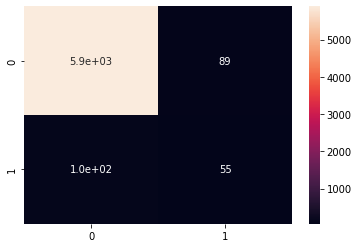

In [19]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [14]:
from sklearn.metrics import precision_score
print(precision_score(actual, predictions, average='weighted'))

0.966838973599724


In [15]:
from sklearn.metrics import recall_score
print(recall_score(actual, predictions, average='weighted'))

0.9684039087947883


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(actual, predictions))

0.9684039087947883


In [17]:
from sklearn.metrics import f1_score
print(f1_score(actual, predictions, average='weighted'))

0.9675935389837907


In [18]:
from sklearn.metrics import classification_report
print(classification_report(actual, predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5980
           1       0.38      0.34      0.36       160

    accuracy                           0.97      6140
   macro avg       0.68      0.66      0.67      6140
weighted avg       0.97      0.97      0.97      6140

